# 梯度下降法

### 0.引入

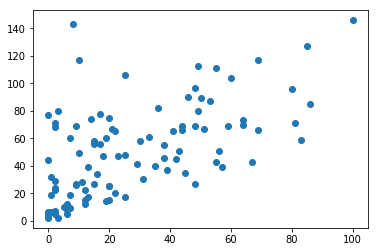

In [7]:
import numpy as np
import matplotlib.pyplot as plt

points = np.genfromtxt('E:\\python AI\\test.txt', delimiter = ',')

#print(points)

x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y)
plt.show()

### 1.损失函数计算

In [8]:
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w * x - b) ** 2;
        
    return total_cost/M

### 2.参数设置

In [10]:
alpha = 0.0001  #学习率
initial_w = 0   #w初始值
initial_b = 0   #b初始值
num_iter = 2000   #迭代次数

### 3.梯度下降

In [12]:
def grad_dec(points, initial_w, initial_b, num_iter):
    w = initial_w
    b = initial_b
    cost_list = []
    
    #迭代
    for i in range(num_iter):
        cost_list.append( compute_cost(w, b, points) )
        w, b =  step_grad_dec(w, b, alpha, points)
        
    return cost_list, w, b

def step_grad_dec(current_w, current_b, alpha, points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += (current_w * x + current_b - y) * x;
        sum_grad_b += current_w * x + current_b - y
    
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b
    
    return updated_w, updated_b 

### 4.测试

w is  1.2785704116498384
b is  4.551092141603902
cost is  989.6132300853616


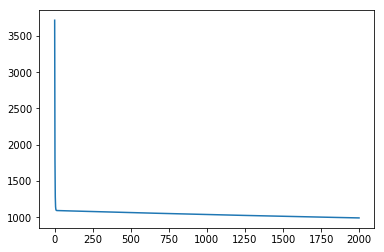

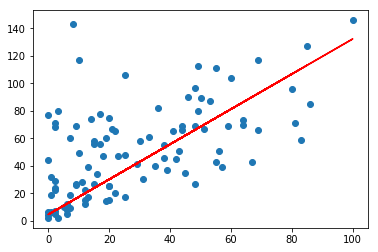

In [13]:
cost_list , w, b = grad_dec(points, initial_w, initial_b, num_iter)

print("w is ", w)
print("b is ", b)

cost = compute_cost (w, b, points)    
print("cost is ", cost)

plt.plot(cost_list)
plt.show()

plt.scatter(x, y)
pred_y = w * x + b

plt.plot(x, pred_y, c = "r")
plt.show()